In [107]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Exercise 1

### Determine PCA of a 3x2 matrix

#### define a matrix

In [188]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


#### First do it manually!

#### 1. Subtract the mean of each variable

In [189]:
col_mean = np.mean(A, axis = 0)
col_mean

array([3., 4.])

In [190]:
mean_centered_A = A - col_mean
mean_centered_A

array([[-2., -2.],
       [ 0.,  0.],
       [ 2.,  2.]])

#### 2. Calculate the Covariance Matrix

In [191]:
covariance_matrix = np.cov(mean_centered_A, rowvar = False)
covariance_matrix

array([[4., 4.],
       [4., 4.]])

In [192]:
covariance_matrix.shape

(2, 2)

#### 3. Compute the Eigenvalues and Eigenvectors

In [193]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [194]:
len(eigenvalues)

2

In [195]:
eigenvalues

array([8., 0.])

In [196]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [197]:
eigenvectors.shape

(2, 2)

#### 4. project data of the original matrix to the new basis

In [198]:
feature_vector = eigenvectors.T
feature_vector

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [201]:
projected_data = np.dot(feature_vector, mean_centered_A.T).T
projected_data

array([[-2.82842712,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.82842712,  0.        ]])

#### conclusion?



*   **The column containing zeros indicate that the data has been projected alon this direction**
*   **The main variation of in the original data must be along the first vector.**



# Exercise 2

### Ok Let's do it again but for a larger matrix 20x5

#### Generate a dummy dataset.

In [204]:
X = np.random.randint(10,50,100).reshape(20,5)
print(X)

[[30 16 43 20 39]
 [13 39 40 20 10]
 [18 43 22 14 12]
 [18 44 38 28 16]
 [22 10 39 44 34]
 [30 16 22 11 33]
 [22 28 26 19 41]
 [36 33 26 10 12]
 [48 28 18 47 42]
 [25 17 48 18 13]
 [31 31 44 17 40]
 [42 16 23 35 27]
 [23 39 25 47 46]
 [33 39 18 17 25]
 [11 22 25 25 18]
 [44 45 28 41 49]
 [32 43 26 40 12]
 [42 45 45 46 35]
 [43 13 26 43 18]
 [13 24 23 11 34]]


#### 1. Subtract the mean of each variable

Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.

In [205]:
col_mean = np.mean(X, axis = 0)
col_mean

array([28.8 , 29.55, 30.25, 27.65, 27.8 ])

In [206]:
mean_centered_data = X - col_mean
mean_centered_data

array([[  1.2 , -13.55,  12.75,  -7.65,  11.2 ],
       [-15.8 ,   9.45,   9.75,  -7.65, -17.8 ],
       [-10.8 ,  13.45,  -8.25, -13.65, -15.8 ],
       [-10.8 ,  14.45,   7.75,   0.35, -11.8 ],
       [ -6.8 , -19.55,   8.75,  16.35,   6.2 ],
       [  1.2 , -13.55,  -8.25, -16.65,   5.2 ],
       [ -6.8 ,  -1.55,  -4.25,  -8.65,  13.2 ],
       [  7.2 ,   3.45,  -4.25, -17.65, -15.8 ],
       [ 19.2 ,  -1.55, -12.25,  19.35,  14.2 ],
       [ -3.8 , -12.55,  17.75,  -9.65, -14.8 ],
       [  2.2 ,   1.45,  13.75, -10.65,  12.2 ],
       [ 13.2 , -13.55,  -7.25,   7.35,  -0.8 ],
       [ -5.8 ,   9.45,  -5.25,  19.35,  18.2 ],
       [  4.2 ,   9.45, -12.25, -10.65,  -2.8 ],
       [-17.8 ,  -7.55,  -5.25,  -2.65,  -9.8 ],
       [ 15.2 ,  15.45,  -2.25,  13.35,  21.2 ],
       [  3.2 ,  13.45,  -4.25,  12.35, -15.8 ],
       [ 13.2 ,  15.45,  14.75,  18.35,   7.2 ],
       [ 14.2 , -16.55,  -4.25,  15.35,  -9.8 ],
       [-15.8 ,  -5.55,  -7.25, -16.65,   6.2 ]])

#### 2. Calculate the Covariance Matrix

Calculate the Covariance Matrix of the mean-centered data.

In [207]:
covariance_matrix = np.cov(mean_centered_data, rowvar = False)
covariance_matrix

array([[127.74736842,  -0.98947368, -15.73684211,  73.34736842,
         46.58947368],
       [ -0.98947368, 146.68157895,  -5.88157895,  14.93947368,
        -10.72631579],
       [-15.73684211,  -5.88157895,  94.19736842,   0.72368421,
         -6.31578947],
       [ 73.34736842,  14.93947368,   0.72368421, 186.55526316,
         57.76842105],
       [ 46.58947368, -10.72631579,  -6.31578947,  57.76842105,
        169.01052632]])

In [208]:
covariance_matrix.shape

(5, 5)

Note: the matrix is symmetrical

#### 3. Compute the Eigenvalues and Eigenvectors

Now, compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix.

In [209]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [210]:
eigenvalues

array([284.58791229,  68.88887528, 100.45007762, 114.80307465,
       155.46216543])

In [211]:
len(eigenvalues)

5

In [212]:
eigenvectors

array([[-0.48593246,  0.72889216,  0.43824214, -0.20113715,  0.00857548],
       [-0.03126598,  0.13053432, -0.07748173,  0.41792041,  0.8951661 ],
       [ 0.05639257,  0.48944128, -0.84450849, -0.20461209, -0.04697243],
       [-0.68529823, -0.45964887, -0.2131231 , -0.46413987,  0.24133377],
       [-0.53858917, -0.02910611, -0.20814504,  0.72635697, -0.37169305]])

In [213]:
eigenvectors.shape

(5, 5)

Note: The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.
A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

#### 4. Sort Eigenvalues in descending order

Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

In [214]:
index_of_sorted = np.argsort(eigenvalues)[::-1]
index_of_sorted

array([0, 4, 3, 2, 1])

In [215]:
sorted_eigenvalues = eigenvalues[index_of_sorted]
sorted_eigenvalues

array([284.58791229, 155.46216543, 114.80307465, 100.45007762,
        68.88887528])

In [216]:
principal_components = eigenvectors[index_of_sorted]
principal_components

array([[-0.48593246,  0.72889216,  0.43824214, -0.20113715,  0.00857548],
       [-0.53858917, -0.02910611, -0.20814504,  0.72635697, -0.37169305],
       [-0.68529823, -0.45964887, -0.2131231 , -0.46413987,  0.24133377],
       [ 0.05639257,  0.48944128, -0.84450849, -0.20461209, -0.04697243],
       [-0.03126598,  0.13053432, -0.07748173,  0.41792041,  0.8951661 ]])

Note: Each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.
Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#### 5. Select a subset from the rearranged Eigenvalue matrix

Select a subset of n first eigenvectors from the rearranged Eigenvector matrix as per our need, n is desired dimension of your final reduced data. i.e. "n_components=2" means you selected the first two principal components.

In [217]:
n_components=2

top_n_principal_components = principal_components[:n_components]
top_n_principal_components

array([[-0.48593246,  0.72889216,  0.43824214, -0.20113715,  0.00857548],
       [-0.53858917, -0.02910611, -0.20814504,  0.72635697, -0.37169305]])

In [218]:
feature_vector = top_n_principal_components.T
feature_vector

array([[-0.48593246, -0.53858917],
       [ 0.72889216, -0.02910611],
       [ 0.43824214, -0.20814504],
       [-0.20113715,  0.72635697],
       [ 0.00857548, -0.37169305]])

Note: The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

#### 6. Transform the data

Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In [219]:
row_feature_vector_transpose = np.transpose(feature_vector)
row_feature_vector_transpose

array([[-0.48593246,  0.72889216,  0.43824214, -0.20113715,  0.00857548],
       [-0.53858917, -0.02910611, -0.20814504,  0.72635697, -0.37169305]])

In [220]:
row_mean_centered_data = np.transpose(mean_centered_data)
row_mean_centered_data

array([[  1.2 , -15.8 , -10.8 , -10.8 ,  -6.8 ,   1.2 ,  -6.8 ,   7.2 ,
         19.2 ,  -3.8 ,   2.2 ,  13.2 ,  -5.8 ,   4.2 , -17.8 ,  15.2 ,
          3.2 ,  13.2 ,  14.2 , -15.8 ],
       [-13.55,   9.45,  13.45,  14.45, -19.55, -13.55,  -1.55,   3.45,
         -1.55, -12.55,   1.45, -13.55,   9.45,   9.45,  -7.55,  15.45,
         13.45,  15.45, -16.55,  -5.55],
       [ 12.75,   9.75,  -8.25,   7.75,   8.75,  -8.25,  -4.25,  -4.25,
        -12.25,  17.75,  13.75,  -7.25,  -5.25, -12.25,  -5.25,  -2.25,
         -4.25,  14.75,  -4.25,  -7.25],
       [ -7.65,  -7.65, -13.65,   0.35,  16.35, -16.65,  -8.65, -17.65,
         19.35,  -9.65, -10.65,   7.35,  19.35, -10.65,  -2.65,  13.35,
         12.35,  18.35,  15.35, -16.65],
       [ 11.2 , -17.8 , -15.8 , -11.8 ,   6.2 ,   5.2 ,  13.2 , -15.8 ,
         14.2 , -14.8 ,  12.2 ,  -0.8 ,  18.2 ,  -2.8 ,  -9.8 ,  21.2 ,
        -15.8 ,   7.2 ,  -9.8 ,   6.2 ]])

In [221]:
eigen_dot = np.dot(feature_vector_transpose, row_mean_centered_data)
eigen_dot

array([[ 12.96490482, -19.18008846, -23.36997019, -17.20701989,
         15.55924032,   5.83724346,  -3.77568923,  -5.0347186 ,
         17.23717899,   5.42702442,   2.87986656,  17.78454148,
         -4.21834464,  -9.11003579,  -9.2586001 ,   4.74157704,
         -8.14273835,   5.67307626,  21.34552149, -10.15296961],
       [-15.52040507, -13.35707662,   3.45613385,  -7.34335236,
        -11.40924928,   0.92525087,  -2.63812307,   5.15718898,
         21.27229899, -19.89695028, -13.67264537,  10.84960573,
          6.19934858,  12.12264648,  -4.54971291,  12.55068131,
         11.6078114 ,  -0.46781325,  10.600405  ,  -5.88604298]])

In [222]:
X_reduced = eigen_dot.T
X_reduced

array([[ 12.96490482, -15.52040507],
       [-19.18008846, -13.35707662],
       [-23.36997019,   3.45613385],
       [-17.20701989,  -7.34335236],
       [ 15.55924032, -11.40924928],
       [  5.83724346,   0.92525087],
       [ -3.77568923,  -2.63812307],
       [ -5.0347186 ,   5.15718898],
       [ 17.23717899,  21.27229899],
       [  5.42702442, -19.89695028],
       [  2.87986656, -13.67264537],
       [ 17.78454148,  10.84960573],
       [ -4.21834464,   6.19934858],
       [ -9.11003579,  12.12264648],
       [ -9.2586001 ,  -4.54971291],
       [  4.74157704,  12.55068131],
       [ -8.14273835,  11.6078114 ],
       [  5.67307626,  -0.46781325],
       [ 21.34552149,  10.600405  ],
       [-10.15296961,  -5.88604298]])

In [223]:
X_reduced.shape

(20, 2)

# Exercise 3

### Now, let’s just combine everything above by making a function and try our Principal Component analysis from scratch on an example.

#### Create a PCA function accepting data matrix and the number of components as input arguments.

In [224]:
def pca(X, n_components):
  col_mean = np.mean(X, axis = 0)
  mean_centered_data = X - col_mean
  covariance_matrix = np.cov(mean_centered_data, rowvar = False)

  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

  index_of_sorted = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalues = eigenvalues[index_of_sorted]
  principal_components = eigenvectors[index_of_sorted]

  eigen_sum = np.sum(sorted_eigenvalues)
  #explainability = np.empty(len(sorted_eigenvalues))
  explainability = {}


  #for idx, eigen_val in enumerate(sorted_eigenvalues):
  for eigen_val in sorted_eigenvalues:
    #explainability[idx] = np.sum(sorted_eigenvalues[:idx + 1]) / eigen_sum
    #explainability[eigen_val] = np.sum(sorted_eigenvalues[:idx + 1]) / eigen_sum
    explainability[eigen_val] = str((eigen_val / eigen_sum) * 100) + ' %'


  top_n_principal_components = principal_components[:n_components]
  feature_vector = top_n_principal_components.T

  row_feature_vector = np.transpose(feature_vector)
  row_mean_centered_data = np.transpose(mean_centered_data)

  eigen_dot = np.dot(row_feature_vector, row_mean_centered_data)
  X_reduced = eigen_dot.T

  return X_reduced, explainability

#### Let's use the IRIS dataset to test our PCA function, and by the same way see if we can classify the dataset in the projected space

In [225]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 1. prepare the dataset & target set for classification

In [226]:
Y = data['target']
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: target, dtype: object

In [227]:
len(Y)

150

In [228]:
X_var = data.iloc[:, :-1]
X_var.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [229]:
X_var.shape

(150, 4)

In [230]:
scaler = StandardScaler().set_output(transform="pandas")
X_new = scaler.fit_transform(X_var)
X_new.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


#### 2. Apply the PCA function

In [231]:
reduced_X, explainability = pca(X_new.to_numpy(), 3)
reduced_X

array([[-0.2316583 , -0.87967436,  0.31762646],
       [ 0.07253025,  0.25502854,  0.20117481],
       [-0.18536908, -0.12326756,  0.04254146],
       [-0.24451042,  0.15034585, -0.00698258],
       [-0.38110853, -1.06194072,  0.24231575],
       [-0.44050933, -1.82346152,  0.32276436],
       [-0.42753067, -0.52226744, -0.13496883],
       [-0.24979851, -0.61982431,  0.26009048],
       [-0.15778746,  0.62875583, -0.14609035],
       [-0.08907179,  0.07093576,  0.30963548],
       [-0.2550866 , -1.38999448,  0.52716354],
       [-0.41738895, -0.54224064,  0.1272438 ],
       [-0.02520974,  0.30325906,  0.23607563],
       [-0.21867964,  0.42151973, -0.14010673],
       [-0.13737131, -2.20145476,  0.77020078],
       [-0.59940097, -3.01760131,  0.49362145],
       [-0.27650482, -1.878515  ,  0.29071661],
       [-0.19721296, -0.89599473,  0.21229633],
       [-0.19891512, -1.6886951 ,  0.64426382],
       [-0.49668081, -1.52476091,  0.20566408],
       [-0.07862214, -0.71993819,  0.557

In [232]:
reduced_X.shape

(150, 3)

In [233]:
explainability

{2.930353775589317: '72.77045209380135 %',
 0.9274036215173419: '23.03052326768065 %',
 0.14834222648163944: '3.683831957627379 %',
 0.02074601399559593: '0.5151926808906321 %'}

#### 3. Create a Pandas Dataframe of reduced Dataset with target data

In [234]:
reduced_dataset = pd.DataFrame(reduced_X)
reduced_dataset['Target'] = Y
reduced_dataset.head()

,0,1,2,Target
0,-0.231658,-0.879674,0.317626,Iris-setosa
1,0.072530,0.255029,0.201175,Iris-setosa
2,-0.185369,-0.123268,0.042541,Iris-setosa
3,-0.244510,0.150346,-0.006983,Iris-setosa
4,-0.381109,-1.061941,0.242316,Iris-setosa


In [235]:
reduced_dataset.shape

(150, 4)

#### 4. Vizualize the data with one and two principal components

In [243]:
def plot_iris_pca(df, n_components):

  # Settin different colours for various categories in the Target column
  target_colors = {
      'Iris-setosa': 'red',
      'Iris-versicolor': 'green',
      'Iris-virginica': 'blue'}

  # Scatter plot
  plt.figure(figsize=(10, 8))

  for target, color in target_colors.items():
    subset = df[df['Target'] == target]
    if n_components == 1:
      plt.scatter(subset[[0]], subset[[0]]*0, label=target, c=color)
    if n_components == 2:
      plt.scatter(subset[[0]], subset[[1]], label=target, c=color)

  # Axis labels and legend
  if n_components == 1:
    plt.xlabel('Component 0')
    plt.ylabel('Component 0')

  if n_components == 2:
    plt.xlabel('Component 0')
    plt.ylabel('Component 1')

  plt.legend()

  # Show the plot
  plt.show()


**For PCA with 1 pricipal component**

In [246]:
reduced_X, explainability = pca(X_new.to_numpy(), 1)
reduced_dataset = pd.DataFrame(reduced_X)
reduced_dataset['Target'] = Y

print(reduced_dataset.shape)
reduced_dataset.head()

(150, 2)


,0,Target
0,-0.231658,Iris-setosa
1,0.072530,Iris-setosa
2,-0.185369,Iris-setosa
3,-0.244510,Iris-setosa
4,-0.381109,Iris-setosa


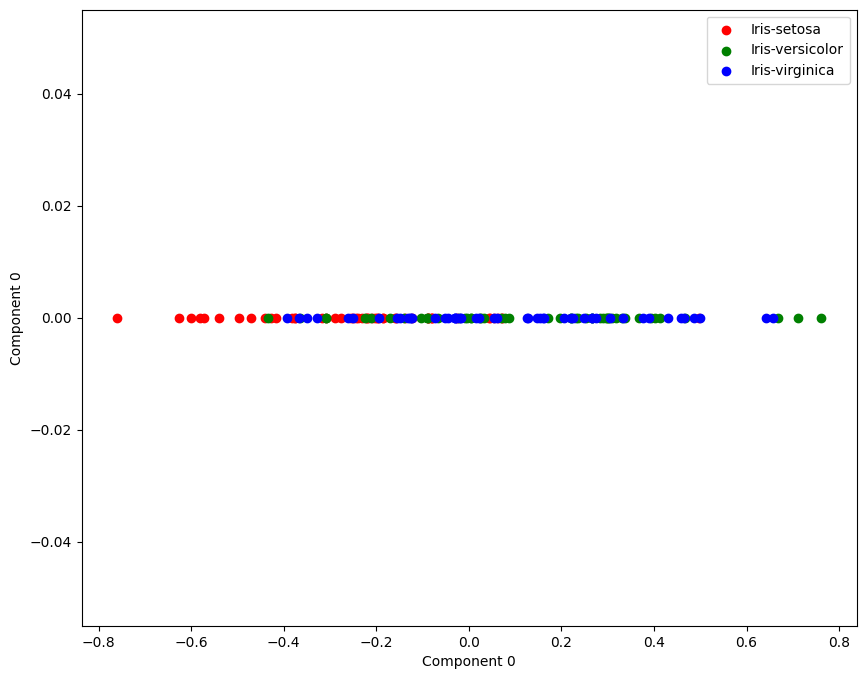

In [247]:
plot_iris_pca(reduced_dataset, 1)

In [248]:
explainability

{2.930353775589317: '72.77045209380135 %',
 0.9274036215173419: '23.03052326768065 %',
 0.14834222648163944: '3.683831957627379 %',
 0.02074601399559593: '0.5151926808906321 %'}

**For PCA with 2 pricipal components**

In [249]:
reduced_X, explainability = pca(X_new.to_numpy(), 2)
reduced_dataset = pd.DataFrame(reduced_X)
reduced_dataset['Target'] = Y

print(reduced_dataset.shape)
reduced_dataset.head()

(150, 3)


,0,1,Target
0,-0.231658,-0.879674,Iris-setosa
1,0.072530,0.255029,Iris-setosa
2,-0.185369,-0.123268,Iris-setosa
3,-0.244510,0.150346,Iris-setosa
4,-0.381109,-1.061941,Iris-setosa


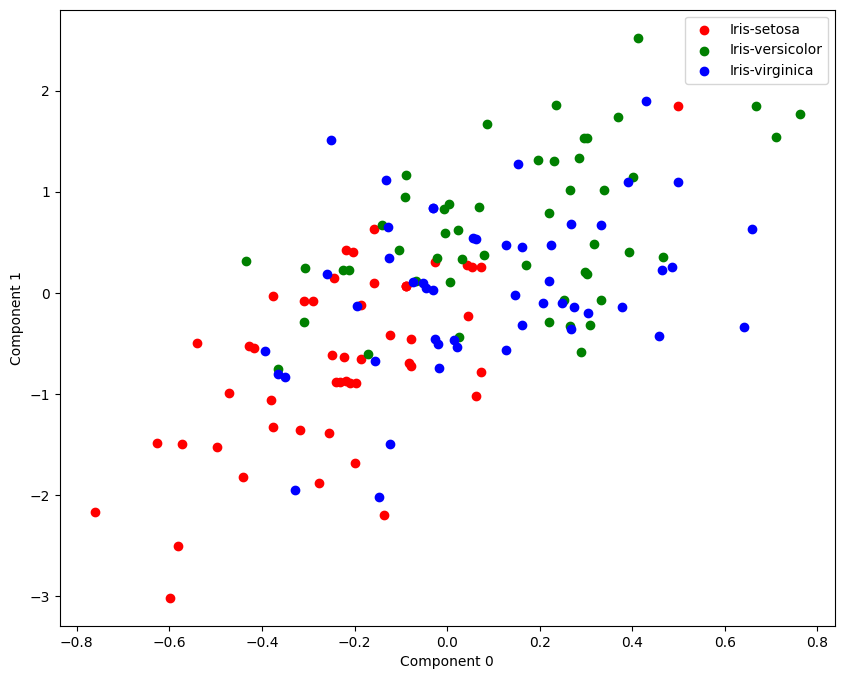

In [250]:
plot_iris_pca(reduced_dataset, 2)

In [251]:
explainability

{2.930353775589317: '72.77045209380135 %',
 0.9274036215173419: '23.03052326768065 %',
 0.14834222648163944: '3.683831957627379 %',
 0.02074601399559593: '0.5151926808906321 %'}

conclusions?

*  **The pricipal components corresponding to eigen values 2.930353775589317 and 0.9274036215173419 is able to explain 72.77% and 23.03% of the data respectively.**

*   **Therfore, PCA with one principal component alone is able to account for 72.77% of the data.**


*   **Similarly, PCA with two principal components able to account for 95.8% of the data.**



# More?

### Go to: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html